In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [4]:
df = pd.read_csv("/content/drive/MyDrive/air_prediction_diploma/Zaporizhzhia_b.csv")

In [5]:
df

,id_station,date,hour,CO,Humidity,NH3,NO2,PM2.5,Pressure,RAD,Temperature
0,358,2020-02-24,1,0.0460,72.6740,0.0000,0.4957,28.3136,99981.5533,NaN,6.98210
1,358,2020-02-24,2,0.0410,73.2841,0.0000,0.5568,29.1728,99905.2876,NaN,7.02780
2,358,2020-02-24,3,0.0418,77.0206,0.0000,0.5569,30.9473,99764.4148,NaN,6.69480
3,358,2020-02-24,4,0.0381,79.0927,0.0000,0.5892,27.7186,99626.1720,NaN,6.38020
4,358,2020-02-24,5,0.0341,79.0298,0.0000,0.6603,23.2400,99497.7275,NaN,5.97380
...,...,...,...,...,...,...,...,...,...,...,...
252251,1905,2024-02-24,20,1.3844,64.5274,0.0001,0.0405,4.1466,102409.4722,13.1079,6.17345
252252,1905,2024-02-24,21,1.3744,63.9805,0.0001,0.0419,3.4754,102416.3326,13.1309,5.78815
252253,1905,2024-02-24,22,1.3988,65.5114,0.0001,0.0405,2.7946,102452.6620,12.7582,5.33635
252254,1905,2024-02-24,23,1.4105,66.4371,0.0001,0.0408,2.3138,102479.4547,13.0719,4.62930


In [7]:
df.describe()

,id_station,hour,CO,Humidity,NH3,NO2,PM2.5,Pressure,RAD,Temperature
count,252256.000000,252256.000000,217936.000000,250629.000000,199050.000000,189409.000000,234680.000000,251548.000000,75033.000000,251548.000000
mean,1184.453987,12.527206,0.773831,61.966409,0.008395,0.055197,12.267601,100594.901974,10.503578,13.542580
std,447.597087,6.922807,3.953699,20.895312,0.055271,0.219597,15.103842,4901.541991,1.870160,10.132244
min,358.000000,1.000000,0.000000,5.916200,0.000000,0.000000,0.000000,989.282200,-1.000000,-17.206000
25%,740.000000,7.000000,0.405500,46.255350,0.001200,0.018700,4.252775,100264.121075,9.137300,5.307150
50%,1295.000000,13.000000,0.562200,63.474300,0.002800,0.029400,8.172200,100824.118450,10.333700,13.003275
75%,1568.000000,19.000000,0.909200,75.178800,0.006100,0.037300,14.782800,101433.412000,11.884100,21.931812
max,1905.000000,24.000000,499.882600,100.000000,22.078000,6.250000,429.155900,103909.405100,224.190000,57.322600


In [8]:
df.isnull().sum()

id_station          0
date                0
hour                0
CO              34320
Humidity         1627
NH3             53206
NO2             62847
PM2.5           17576
Pressure          708
RAD            177223
Temperature       708
dtype: int64

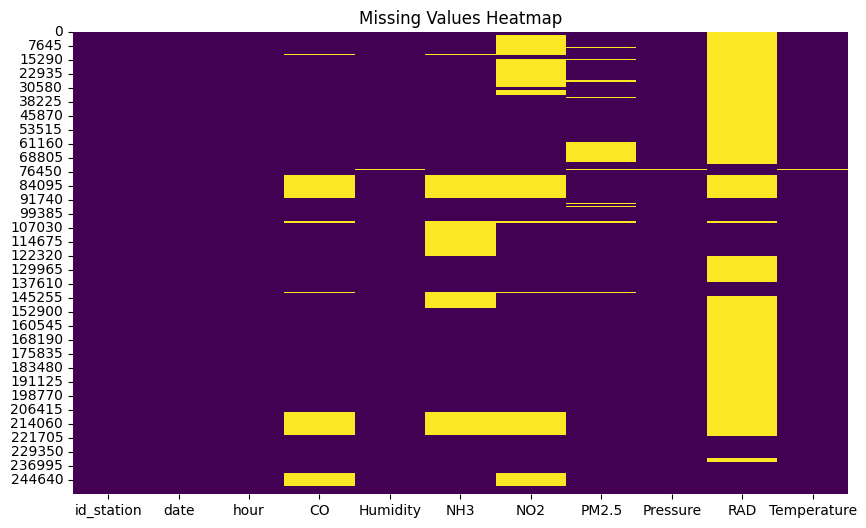

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
df.drop('RAD', axis=1)

,id_station,date,hour,CO,Humidity,NH3,NO2,PM2.5,Pressure,Temperature
0,358,2020-02-24,1,0.0460,72.6740,0.0000,0.4957,28.3136,99981.5533,6.98210
1,358,2020-02-24,2,0.0410,73.2841,0.0000,0.5568,29.1728,99905.2876,7.02780
2,358,2020-02-24,3,0.0418,77.0206,0.0000,0.5569,30.9473,99764.4148,6.69480
3,358,2020-02-24,4,0.0381,79.0927,0.0000,0.5892,27.7186,99626.1720,6.38020
4,358,2020-02-24,5,0.0341,79.0298,0.0000,0.6603,23.2400,99497.7275,5.97380
...,...,...,...,...,...,...,...,...,...,...
252251,1905,2024-02-24,20,1.3844,64.5274,0.0001,0.0405,4.1466,102409.4722,6.17345
252252,1905,2024-02-24,21,1.3744,63.9805,0.0001,0.0419,3.4754,102416.3326,5.78815
252253,1905,2024-02-24,22,1.3988,65.5114,0.0001,0.0405,2.7946,102452.6620,5.33635
252254,1905,2024-02-24,23,1.4105,66.4371,0.0001,0.0408,2.3138,102479.4547,4.62930


In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[:, 3:]), columns=df.columns[3:])

In [ ]:
df_imputed[['id_station', 'date', 'hour']] = df[['id_station', 'date', 'hour']]

In [ ]:
# df_imputed.to_csv('/content/drive/MyDrive/air_prediction_diploma/knn_formated_df.csv')

In [27]:
df = pd.read_csv("/content/drive/MyDrive/air_prediction_diploma/knn_formated_df.csv")

In [28]:
df

,Unnamed: 0,CO,Humidity,NH3,NO2,PM2.5,Pressure,RAD,Temperature,id_station,date,hour
0,0,0.0460,72.6740,0.0000,0.4957,28.3136,99981.5533,9.16548,6.98210,358,2020-02-24,1
1,1,0.0410,73.2841,0.0000,0.5568,29.1728,99905.2876,9.16548,7.02780,358,2020-02-24,2
2,2,0.0418,77.0206,0.0000,0.5569,30.9473,99764.4148,9.16548,6.69480,358,2020-02-24,3
3,3,0.0381,79.0927,0.0000,0.5892,27.7186,99626.1720,9.16548,6.38020,358,2020-02-24,4
4,4,0.0341,79.0298,0.0000,0.6603,23.2400,99497.7275,9.16548,5.97380,358,2020-02-24,5
...,...,...,...,...,...,...,...,...,...,...,...,...
252251,252251,1.3844,64.5274,0.0001,0.0405,4.1466,102409.4722,13.10790,6.17345,1905,2024-02-24,20
252252,252252,1.3744,63.9805,0.0001,0.0419,3.4754,102416.3326,13.13090,5.78815,1905,2024-02-24,21
252253,252253,1.3988,65.5114,0.0001,0.0405,2.7946,102452.6620,12.75820,5.33635,1905,2024-02-24,22
252254,252254,1.4105,66.4371,0.0001,0.0408,2.3138,102479.4547,13.07190,4.62930,1905,2024-02-24,23


In [29]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [30]:
df.describe()

,CO,Humidity,NH3,NO2,PM2.5,Pressure,RAD,Temperature,id_station,hour
count,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000,252256.000000
mean,0.730735,61.975047,0.009277,0.049630,11.710574,100596.464692,9.844294,13.526249,1184.453987,12.527206
std,3.692672,20.858304,0.049261,0.197248,14.751820,4894.827140,1.185507,10.128961,447.597087,6.922807
min,0.000000,5.916200,0.000000,0.000000,0.000000,989.282200,-1.000000,-17.206000,358.000000,1.000000
25%,0.381520,46.310700,0.001600,0.017900,3.642775,100265.610850,9.322860,5.298275,740.000000,7.000000
50%,0.514400,63.481300,0.003800,0.026700,7.596650,100825.453900,9.479020,12.973775,1295.000000,13.000000
75%,0.855300,75.171550,0.010900,0.035900,14.146875,101433.877775,9.745500,21.912437,1568.000000,19.000000
max,499.882600,100.000000,22.078000,6.250000,429.155900,103909.405100,224.190000,57.322600,1905.000000,24.000000


In [31]:
df.isnull().sum()

CO             0
Humidity       0
NH3            0
NO2            0
PM2.5          0
Pressure       0
RAD            0
Temperature    0
id_station     0
date           0
hour           0
dtype: int64

In [32]:
df['time'] = df.apply(lambda x: datetime.datetime(year=int(x['date'].split('-')[0]),
                                                  month=int(x['date'].split('-')[1]),
                                                  day=int(x['date'].split('-')[2]),
                                                  hour=x['hour']-1), axis=1)

In [33]:
df['time'] = pd.to_datetime(df['time'])
df['date']=df['time'].dt.date

In [34]:
df

,CO,Humidity,NH3,NO2,PM2.5,Pressure,RAD,Temperature,id_station,date,hour,time
0,0.0460,72.6740,0.0000,0.4957,28.3136,99981.5533,9.16548,6.98210,358,2020-02-24,1,2020-02-24 00:00:00
1,0.0410,73.2841,0.0000,0.5568,29.1728,99905.2876,9.16548,7.02780,358,2020-02-24,2,2020-02-24 01:00:00
2,0.0418,77.0206,0.0000,0.5569,30.9473,99764.4148,9.16548,6.69480,358,2020-02-24,3,2020-02-24 02:00:00
3,0.0381,79.0927,0.0000,0.5892,27.7186,99626.1720,9.16548,6.38020,358,2020-02-24,4,2020-02-24 03:00:00
4,0.0341,79.0298,0.0000,0.6603,23.2400,99497.7275,9.16548,5.97380,358,2020-02-24,5,2020-02-24 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
252251,1.3844,64.5274,0.0001,0.0405,4.1466,102409.4722,13.10790,6.17345,1905,2024-02-24,20,2024-02-24 19:00:00
252252,1.3744,63.9805,0.0001,0.0419,3.4754,102416.3326,13.13090,5.78815,1905,2024-02-24,21,2024-02-24 20:00:00
252253,1.3988,65.5114,0.0001,0.0405,2.7946,102452.6620,12.75820,5.33635,1905,2024-02-24,22,2024-02-24 21:00:00
252254,1.4105,66.4371,0.0001,0.0408,2.3138,102479.4547,13.07190,4.62930,1905,2024-02-24,23,2024-02-24 22:00:00


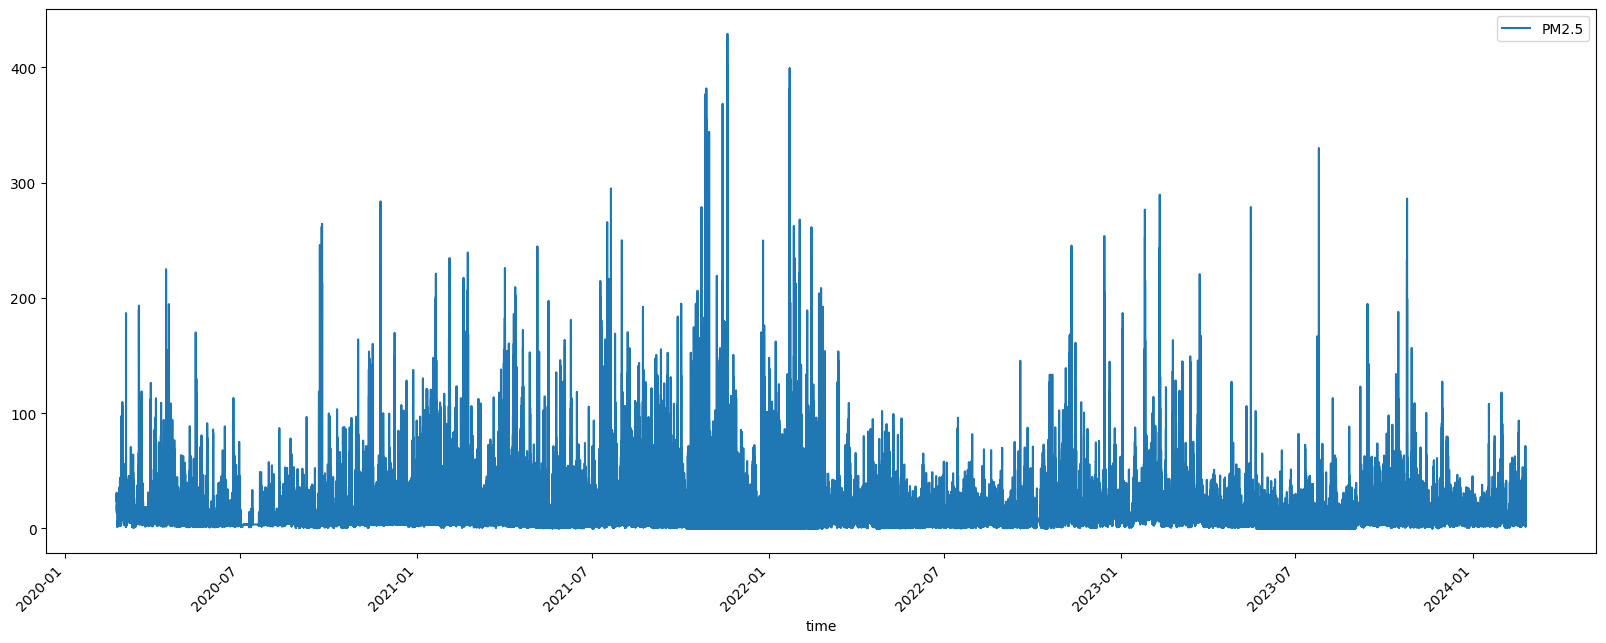

In [35]:
df.plot(x='time',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

In [36]:
columns_to_drop = ['date', 'hour']
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
desired_columns_order = [ 'time', 'PM2.5', 'Temperature', 'Humidity', 'Pressure', 'NO2', 'CO', 'NH3', 'id_station']
df = df[desired_columns_order]

In [38]:
df.tail(10)

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,id_station
252246,2024-02-24 14:00:00,4.3621,11.54035,55.8326,102227.8471,0.0408,1.2612,0.0002,1905
252247,2024-02-24 15:00:00,3.8561,11.65485,54.8712,102231.0828,0.0412,1.2490,0.0002,1905
252248,2024-02-24 16:00:00,4.7034,10.27330,57.8545,102269.8419,0.0399,1.2915,0.0001,1905
252249,2024-02-24 17:00:00,8.5776,8.14525,63.4364,102343.9741,0.0384,1.3611,0.0001,1905
252250,2024-02-24 18:00:00,8.4070,6.79975,65.6170,102394.6202,0.0387,1.3955,0.0001,1905
252251,2024-02-24 19:00:00,4.1466,6.17345,64.5274,102409.4722,0.0405,1.3844,0.0001,1905
252252,2024-02-24 20:00:00,3.4754,5.78815,63.9805,102416.3326,0.0419,1.3744,0.0001,1905
252253,2024-02-24 21:00:00,2.7946,5.33635,65.5114,102452.6620,0.0405,1.3988,0.0001,1905
252254,2024-02-24 22:00:00,2.3138,4.62930,66.4371,102479.4547,0.0408,1.4105,0.0001,1905
252255,2024-02-24 23:00:00,2.3000,3.81415,67.2950,102493.8650,0.0414,1.4215,0.0001,1905


In [39]:
df_new = {}
for time, group in df.groupby('time'):
    df_new[time] = group.mean()

df = pd.DataFrame(df_new).T

df.reset_index(drop=True, inplace=True)

In [40]:
df.drop(columns='id_station', inplace=True)

In [41]:
df

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3
0,2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067
1,2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433
2,2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467
3,2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267
4,2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967
...,...,...,...,...,...,...,...,...
34971,2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997
34972,2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298
34973,2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963
34974,2024-02-24 22:00:00,11.528817,5.692467,65.246033,101527.996033,0.039267,1.193333,0.00298


In [42]:
def calculate_24hr_avg(series):
    return series.rolling(window=24, min_periods=16).mean()

def calculate_8hr_max(series):
    return series.rolling(window=8, min_periods=1).max()

df["PM2.5_avg_24h"] = calculate_24hr_avg(df["PM2.5"])
df["NO2_avg_24h"] = calculate_24hr_avg(df["NO2"])
df["CO_max_8h"] = df["CO"].rolling(window = 8, min_periods = 1).max().values

In [43]:
df

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,PM2.5_avg_24h,NO2_avg_24h,CO_max_8h
0,2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067,NaN,NaN,0.215500
1,2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433,NaN,NaN,0.218900
2,2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467,NaN,NaN,0.219833
3,2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267,NaN,NaN,0.219833
4,2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967,NaN,NaN,0.219833
...,...,...,...,...,...,...,...,...,...,...,...
34971,2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997,13.326482,0.034155,1.167817
34972,2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298,13.478515,0.034471,1.167817
34973,2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963,13.377523,0.034775,1.173400
34974,2024-02-24 22:00:00,11.528817,5.692467,65.246033,101527.996033,0.039267,1.193333,0.00298,13.384433,0.035077,1.193333


In [44]:
df.isnull().sum()

time              0
PM2.5             0
Temperature       0
Humidity          0
Pressure          0
NO2               0
CO                0
NH3               0
PM2.5_avg_24h    15
NO2_avg_24h      15
CO_max_8h         0
dtype: int64

In [46]:
df["PM2.5_avg_24h"].fillna(df["PM2.5"], inplace=True, axis=0)
df["NO2_avg_24h"].fillna(df["NO2"], inplace=True, axis=0)

In [47]:
df

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,PM2.5_avg_24h,NO2_avg_24h,CO_max_8h
0,2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067,26.969900,0.862333,0.215500
1,2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433,25.700867,0.874100,0.218900
2,2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467,29.483600,0.941067,0.219833
3,2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267,26.984167,1.041633,0.219833
4,2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967,21.940900,1.153833,0.219833
...,...,...,...,...,...,...,...,...,...,...,...
34971,2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997,13.326482,0.034155,1.167817
34972,2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298,13.478515,0.034471,1.167817
34973,2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963,13.377523,0.034775,1.173400
34974,2024-02-24 22:00:00,11.528817,5.692467,65.246033,101527.996033,0.039267,1.193333,0.00298,13.384433,0.035077,1.193333


In [48]:
df.isnull().sum()

time             0
PM2.5            0
Temperature      0
Humidity         0
Pressure         0
NO2              0
CO               0
NH3              0
PM2.5_avg_24h    0
NO2_avg_24h      0
CO_max_8h        0
dtype: int64

In [49]:
def linear_interpolation(x, x0, x1, y0, y1):
    """
    Perform linear interpolation to calculate the AQI.

    Parameters:
        x (float): Input value.
        x0 (float): Lower bound of the input range.
        x1 (float): Upper bound of the input range.
        y0 (float): Lower bound of the output range.
        y1 (float): Upper bound of the output range.

    Returns:
        float: Interpolated value.
    """
    return ((y1 - y0) / (x1 - x0)) * (x - x0) + y0

In [50]:
def calculate_aqi_pm25(concentration):
    """
    Calculate the Air Quality Index (AQI) for PM2.5 pollutant.

    Parameters:
        concentration (float): Concentration of PM2.5 in micrograms per cubic meter (µg/m³).

    Returns:
        int: Air Quality Index (AQI) value.
    """
    if concentration <= 12.0:
        return linear_interpolation(concentration, 0, 12.0, 0, 50)
    elif concentration <= 35.4:
        return linear_interpolation(concentration, 12.1, 35.4, 51, 100)
    elif concentration <= 55.4:
        return linear_interpolation(concentration, 35.5, 55.4, 101, 150)
    elif concentration <= 150.4:
        return linear_interpolation(concentration, 55.5, 150.4, 151, 200)
    elif concentration <= 250.4:
        return linear_interpolation(concentration, 150.5, 250.4, 201, 300)
    elif concentration <= 350.4:
        return linear_interpolation(concentration, 250.5, 350.4, 301, 400)
    else:
        return 500  # AQI > 500 is considered hazardous

In [51]:
def calculate_aqi_no2(concentration):
    """
    Calculate the Air Quality Index (AQI) for Nitrogen Dioxide (NO2) pollutant.

    Parameters:
        concentration (float): Concentration of NO2 in parts per million (ppm).

    Returns:
        int: Air Quality Index (AQI) value.
    """
    if concentration <= 0.053:
        return linear_interpolation(concentration, 0, 0.053, 0, 50)
    elif concentration <= 0.1:
        return linear_interpolation(concentration, 0.054, 0.1, 51, 100)
    elif concentration <= 0.36:
        return linear_interpolation(concentration, 0.101, 0.36, 101, 150)
    elif concentration <= 0.65:
        return linear_interpolation(concentration, 0.361, 0.65, 151, 200)
    elif concentration <= 1.25:
        return linear_interpolation(concentration, 0.651, 1.25, 201, 300)
    elif concentration <= 1.65:
        return linear_interpolation(concentration, 1.251, 1.65, 301, 400)
    else:
        return 500  # AQI > 500 is considered hazardous

In [52]:
def calculate_aqi_co(concentration):
    """
    Calculate the Air Quality Index (AQI) for Carbon Monoxide (CO) pollutant.

    Parameters:
        concentration (float): Concentration of CO in parts per million (ppm).

    Returns:
        int: Air Quality Index (AQI) value.
    """
    if concentration <= 4.4:
        return linear_interpolation(concentration, 0, 4.4, 0, 50)
    elif concentration <= 9.4:
        return linear_interpolation(concentration, 4.5, 9.4, 51, 100)
    elif concentration <= 12.4:
        return linear_interpolation(concentration, 9.5, 12.4, 101, 150)
    elif concentration <= 15.4:
        return linear_interpolation(concentration, 12.5, 15.4, 151, 200)
    elif concentration <= 30.4:
        return linear_interpolation(concentration, 15.5, 30.4, 201, 300)
    elif concentration <= 40.4:
        return linear_interpolation(concentration, 30.5, 40.4, 301, 400)
    else:
        return 500  # AQI > 500 is considered hazardous

In [53]:
df["PM2.5_subindex"] = df["PM2.5_avg_24h"].apply(lambda x: calculate_aqi_pm25(x))
df["NO2_subindex"] = df["NO2_avg_24h"].apply(lambda x: calculate_aqi_no2(x))
df["CO_subindex"] = df["CO_max_8h"].apply(lambda x: calculate_aqi_co(x))

In [54]:
df

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,PM2.5_avg_24h,NO2_avg_24h,CO_max_8h,PM2.5_subindex,NO2_subindex,CO_subindex
0,2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067,26.969900,0.862333,0.215500,82.271464,235.928214,2.448864
1,2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433,25.700867,0.874100,0.218900,79.602681,237.872955,2.487500
2,2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467,29.483600,0.941067,0.219833,87.557785,248.940902,2.498106
3,2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267,26.984167,1.041633,0.219833,82.301466,265.562104,2.498106
4,2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967,21.940900,1.153833,0.219833,71.695455,284.106010,2.498106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997,13.326482,0.034155,1.167817,53.579296,32.221567,13.270644
34972,2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298,13.478515,0.034471,1.167817,53.899023,32.519785,13.270644
34973,2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963,13.377523,0.034775,1.173400,53.686636,32.806735,13.334091
34974,2024-02-24 22:00:00,11.528817,5.692467,65.246033,101527.996033,0.039267,1.193333,0.00298,13.384433,0.035077,1.193333,53.701167,33.091588,13.560606


In [56]:
df["AQI"] = round(df[["PM2.5_subindex", "NO2_subindex", "CO_subindex"]].max(axis = 1))

In [57]:
df

,time,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,PM2.5_avg_24h,NO2_avg_24h,CO_max_8h,PM2.5_subindex,NO2_subindex,CO_subindex,AQI
0,2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067,26.969900,0.862333,0.215500,82.271464,235.928214,2.448864,236.0
1,2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433,25.700867,0.874100,0.218900,79.602681,237.872955,2.487500,238.0
2,2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467,29.483600,0.941067,0.219833,87.557785,248.940902,2.498106,249.0
3,2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267,26.984167,1.041633,0.219833,82.301466,265.562104,2.498106,266.0
4,2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967,21.940900,1.153833,0.219833,71.695455,284.106010,2.498106,284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997,13.326482,0.034155,1.167817,53.579296,32.221567,13.270644,54.0
34972,2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298,13.478515,0.034471,1.167817,53.899023,32.519785,13.270644,54.0
34973,2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963,13.377523,0.034775,1.173400,53.686636,32.806735,13.334091,54.0
34974,2024-02-24 22:00:00,11.528817,5.692467,65.246033,101527.996033,0.039267,1.193333,0.00298,13.384433,0.035077,1.193333,53.701167,33.091588,13.560606,54.0


In [58]:
df = df.set_index(['time']).drop(columns=['PM2.5_avg_24h', 'NO2_avg_24h', 'CO_max_8h', 'PM2.5_subindex', 'NO2_subindex', 'CO_subindex'])

In [59]:
df

,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3,AQI
time,,,,,,,,
2020-02-24 00:00:00,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067,236.0
2020-02-24 01:00:00,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433,238.0
2020-02-24 02:00:00,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467,249.0
2020-02-24 03:00:00,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267,266.0
2020-02-24 04:00:00,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967,284.0
...,...,...,...,...,...,...,...,...
2024-02-24 19:00:00,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997,54.0
2024-02-24 20:00:00,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298,54.0
2024-02-24 21:00:00,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963,54.0


In [60]:
columns = list(df.columns)
columns = [columns[-1]] + columns[:-1]
df = df[columns]

In [61]:
df

,AQI,PM2.5,Temperature,Humidity,Pressure,NO2,CO,NH3
time,,,,,,,,
2020-02-24 00:00:00,236.0,26.9699,6.5494,73.3151,100133.5242,0.862333,0.2155,0.006067
2020-02-24 01:00:00,238.0,25.700867,6.668367,73.686667,100044.462667,0.8741,0.2189,0.006433
2020-02-24 02:00:00,249.0,29.4836,6.339967,77.167033,99925.1519,0.941067,0.219833,0.006467
2020-02-24 03:00:00,266.0,26.984167,6.046933,79.534967,99769.9462,1.041633,0.2166,0.006267
2020-02-24 04:00:00,284.0,21.9409,5.673433,79.255633,99647.0427,1.153833,0.2143,0.005967
...,...,...,...,...,...,...,...,...
2024-02-24 19:00:00,54.0,13.966017,7.0755,62.7445,101478.668183,0.039283,1.157667,0.002997
2024-02-24 20:00:00,54.0,13.207283,6.62655,62.8344,101484.364817,0.039767,1.158433,0.00298
2024-02-24 21:00:00,54.0,13.062883,6.218408,63.994525,101506.5489,0.0394,1.1734,0.002963


In [ ]:
df.to_csv('/content/drive/MyDrive/air_prediction_diploma/zaporizhya_new_24_04.csv')
